## Ejemplo de Regresión Lineal Multiple

La siguiente tabla recoge la información proporcionada por 8 empresas con relación a su producto estrella.  Los  datos  muestran  las  ventas  anuales  en  toneladas  (Y),  el  gasto  anual  en  publicidad  en  miles de euros (X1)  y  la  valoración de la calidad del producto por parte de los consumidores (X2). Queremos  construir  un  modelo  explicativo  que  relacione  las  ventas  del  producto  con  el  gasto  en  publicidad y la opinión de los consumidores respecto a su calidad.

<img src="figs/rlmultiple_tabla.png">

Escribimos la matriz X
$$X=
\begin{pmatrix}
1 & 58 & 111\\
1 & 84 & 131\\
1 & 78 & 158\\
1 & 81 & 147\\
1 & 82 & 121\\
1 & 102& 165\\
1 & 85 & 174\\
1& 102 & 169
\end{pmatrix}
$$
y el vector $y=(64,78,83,88,89,99,101,102)^T$

Para calcular los valores de las estimaciones de los parámetros ($b=(\beta_0,\beta_1,\beta_2$)^T) resolvemos el siguiente sistema de ecuaciones:
$$
X^TXb=Xy
$$
y obtenemos
$$
b=\begin{pmatrix}
9.05\\
0.52\\
0.24
\end{pmatrix}
$$

Por tanto, el modelo de regresión lineal viene dado por la siguiente expressión:
$$
\hat Y = 9.05 + 0.52X_1 + 0.24X_2
$$

Vamos  a  calcular  los  intervalos  de  confianza  y  significación  de  los  parámetros  $\beta_1$ y $\beta_2$.  Para  ello  necesitamos estimar primero la varianza de estos parámetros.

Primero, será necesario estimar primero la varianza residual
$$
\hat \sigma^2=\frac{1}{n-p-1}e^Te
$$

Como $e^Te=Y^TY- b X^TX$, entonces 
$$
\hat \sigma^2=\frac{63140-62970.84}{8-2-1}=33.83
$$

Ahora 
$$
(X^TX)^{-1}=
\begin{pmatrix}
6.35& -3.2\cdot 10^{-2}&2.4\cdot 10^{-2}\\
-3.2\cdot 10^{-2}& 1.5\cdot 10^{-3}&-6.5\cdot 10^{-4}\\
2.4\cdot 10^{-2}& -6.5\cdot 10^{-3}&5.3\cdot 10^{-4}
\end{pmatrix}
$$

Entonces, $Var[\hat \beta_1]=33.83\cdot 1.5\cdot 10^{-3}=0.0548$ y 
$Var[\hat \beta_2]=33.83\cdot 5.3\cdot 10^{-4}=0.0182$.

Con esto, podemos calcular los intervalos de confianza del 95%:
$$
I_{\beta_1}^{0.95}=0.52\pm 2.57\cdot \sqrt{0.0548}
$$
$$
I_{\beta_2}^{0.95}=0.24\pm 2.57\cdot \sqrt{0.0182}
$$

Realizamos el test de Wald para $\beta_1$ y $\beta_2$.

$H_0:\ \beta_1=0$

$H_1:\ \beta_1\neq 0$

El estadístico pivote es $t_p=\frac{0.52}{\sqrt{0.0548}}=2.22$ y el p-valor $$
2\cdot P(t_{n-p-1}>|t_p|)=2\cdot P(t_5>2.22)>0.05
$$

$H_0:\ \beta_2=0$

$H_1:\ \beta_2\neq 0$

El estadístico pivote es $t_p=\frac{0.24}{\sqrt{0.0182}}=1.178$ y el p-valor $$
2\cdot P(t_{n-p-1}>|t_p|)=2\cdot P(t_5>1.178)>0.05
$$

Por  tanto,  concluimos  que  ni  la  inversión  anual  en  publicidad,  ni  la  valoración  de  la  calidad  del  producto por parte del consumidor influyen de manera significativa en las ventas del producto. 

Vamos a realizar el contraste F:

$H_0:\ \beta_0=\beta_1=\beta_2=0$

$H_1:\ \exists j\in\{0,1,2\} t.q. \beta_j\neq 0$

El estadístico pivote es 
$$
F=\frac{SC(X)/p}{SCE/(n-p-1)}=\frac{1018.84/2}{169.15/5}=15.06
$$

ya que $SCE=\sum_i (y_i-y_i)^2$ y $SCT=\sum_{i}(y_i-\bar y)^2$.

El p-valor del contraste F es $P(F_{p,n-p-1}>F)=P(F_{2,5}>15.06)<0.05$. Por  tanto,  la  inversión  realizada  en  publicidad  y  la  valoración  de  calidad  dada  por  el  consumidor,  influyen  conjuntamente  en  las  ventas  de  un  producto.

El coeficiente de determinación y el corregido son los siguientes
$$
R^2=1-\frac{SCE}{SCT}=0.86
$$
$$
\bar R^2=1-\frac{SCE/5}{SCT/2}=0.79
$$
  
Las variables inversión  realizada  en  publicidad  y  la  valoración  de  calidad  dada  por  el  consumidor explican  el  80% de la variabilidad en las ventas medias anuales (coeficiente de determinación corregido).

Todo esto se puede hacer usando R de la siguiente forma.

In [10]:
y <- c(64, 78, 83, 88, 89, 99, 101, 102)

x1<- c(58, 84, 78, 81, 82, 102, 85, 102)

x2<-c(111, 131, 158, 147, 121, 165, 174, 169)



In [11]:
ej2<-lm(y~x1+x2)
summary(ej2)
#deviance(ej2)


Call:
lm(formula = y ~ x1 + x2)

Residuals:
      1       2       3       4       5       6       7       8 
-1.8419 -6.1641 -4.5155  1.5608  8.2740 -2.6805  6.0066 -0.6394 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   9.0538    14.9631   0.605   0.5715  
x1            0.5203     0.2317   2.246   0.0747 .
x2            0.2397     0.1378   1.740   0.1423  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.939 on 5 degrees of freedom
Multiple R-squared:  0.8516,	Adjusted R-squared:  0.7922 
F-statistic: 14.34 on 2 and 5 DF,  p-value: 0.008489


In [12]:
confint(ej2)

,2.5 %,97.5 %
(Intercept),-29.41001993,47.5177197
x1,-0.07522724,1.1157852
x2,-0.11435554,0.5938483


# Diagnosis del modelo

Independencia de los datos, normalidad de los residuos, 

#### Independencia
Test de Durbin-Watson para el análisis de la correlacion o independencia de los datos. 

In [41]:
# paquete necesario para hacer este test
#install.packages("lmtest")
#library(lmtest)
dwtest(y ~ x1+x2)



	Durbin-Watson test

data:  y ~ x1 + x2
DW = 1.9452, p-value = 0.4345
alternative hypothesis: true autocorrelation is greater than 0


No podemos rechazar la hipótesis nula (datos incorrelados), por tanto aceptamos que no son correctados.

#### Normalidad 

Analizamos la normalidad de los residuos (estandarizados)

In [35]:
res.estan.ej2<-residuals(ej2)/(summary(ej2)$sig*sqrt(1-influence(ej2)$hat)) 
ks.test(res.estan.ej2,pnorm,mean(res.estan.ej2),sd(res.estan.ej2))


	One-sample Kolmogorov-Smirnov test

data:  res.estan.ej2
D = 0.18634, p-value = 0.8993
alternative hypothesis: two-sided


No podemos rechazar la normalidad, por tanto la aceptamos. Dibujamos histograma con respecto a la curva de la distribucion normal

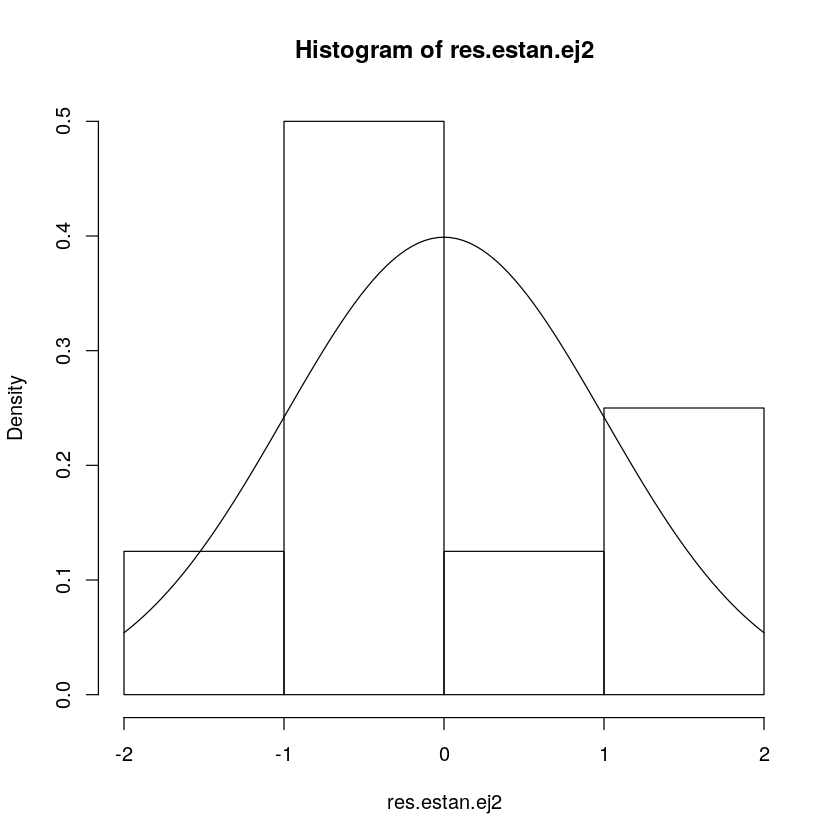

In [20]:
hist(res.estan.ej2, freq = FALSE)
curve(dnorm, add = TRUE)

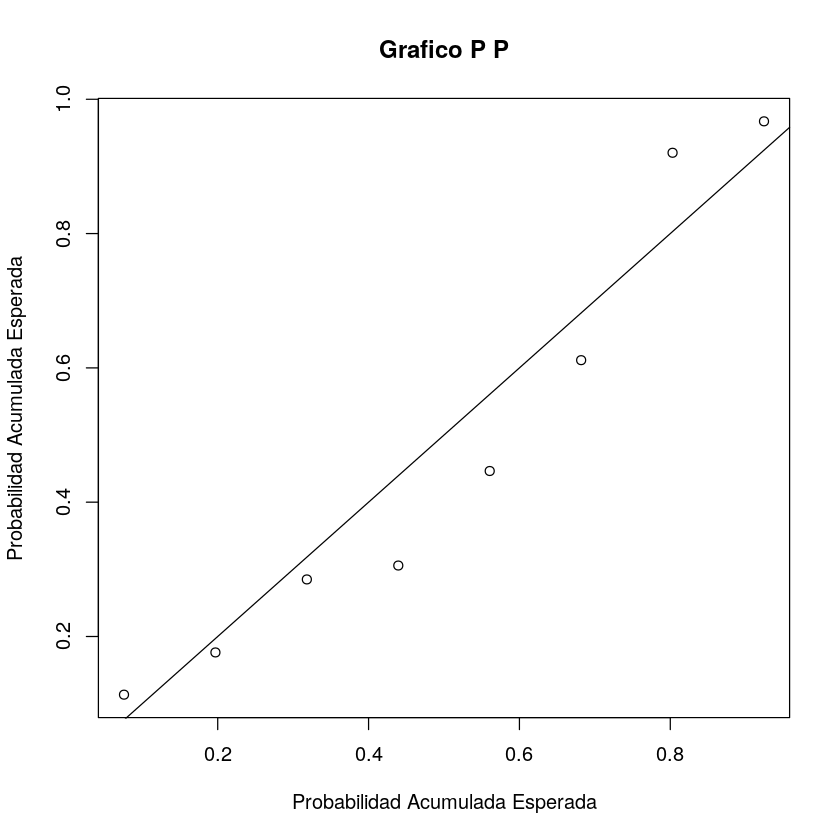

In [33]:
# El grafico P P tambien puede usarse para analizar la normalidad de los datos
dist.prob <- pnorm(res.estan.ej2)
plot(ppoints(length(res.estan.ej2)), sort(dist.prob),
     main = "Grafico P P", xlab = "Probabilidad Acumulada Esperada", 
     ylab = "Probabilidad Acumulada Esperada")
abline(0,1)

La distancia entre la probabilidad observada y la esperada (distribución normal) es pequeñá. Normalidad aceptada. 

#### Varianza constante

Analizamos ahora la hipótesis de varianza constante de los residuos. Dibujamos los residuos y los residuos estandarizados.

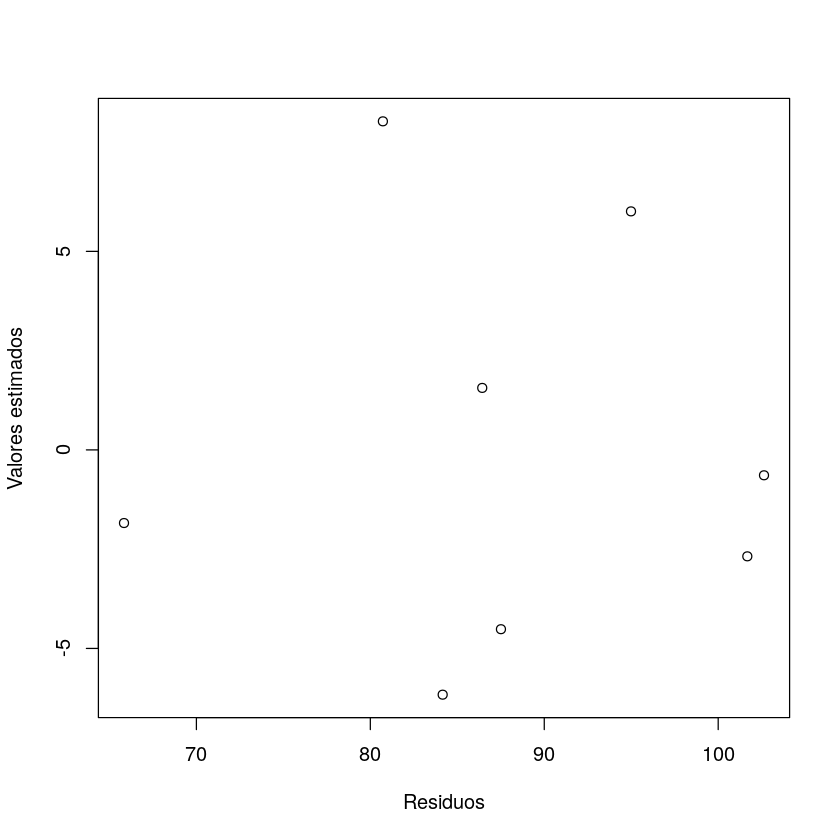

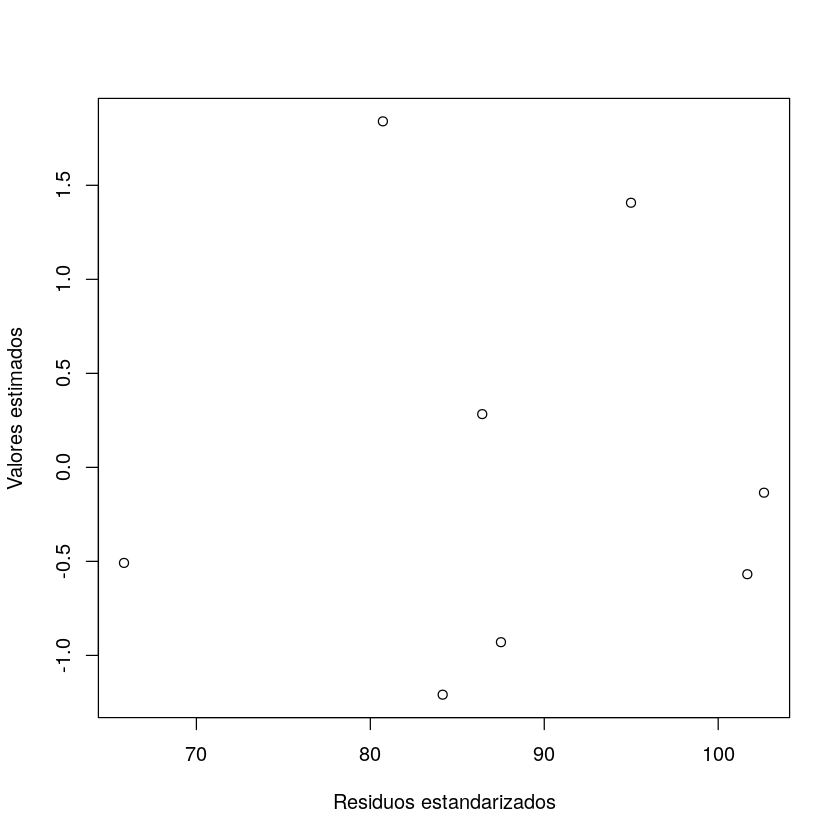

In [49]:
yhat=9.0538 +x1*0.5203+x2*0.2397
plot(yhat,residuals(ej2),xlab = "Residuos", ylab = "Valores estimados")
plot(yhat,res.estan.ej2,xlab = "Residuos estandarizados", ylab = "Valores estimados")

#### Valores influyentes

Serán candidatos a valor influyente si su valor hat es superior a (p+1)/n=(2+1)/8=0.375

In [50]:
influence.measures(ej2) 

Influence measures of
	 lm(formula = y ~ x1 + x2) :

   dfb.1_  dfb.x1    dfb.x2   dffit cov.r  cook.d   hat inf
1 -0.5528  0.3144  0.078360 -0.6058 4.472 0.14499 0.627   *
2 -0.3042 -0.4012  0.555479 -0.7672 0.939 0.17357 0.263    
3 -0.0219  0.4677 -0.474254 -0.6434 1.652 0.14265 0.331    
4  0.0241 -0.0322  0.023257  0.1025 2.160 0.00430 0.139    
5  1.2417  1.3685 -2.092346  2.5003 0.115 0.84058 0.427   *
6  0.2315 -0.2649  0.059281 -0.4016 2.533 0.06287 0.369    
7 -0.5008 -0.9315  1.347845  1.5669 0.833 0.61782 0.483   *
8  0.0586 -0.0503 -0.000474 -0.0907 3.023 0.00341 0.361   *

En esta tabla los valores 1, 5, 7 y 8 tienen asterisco y por tanto son susceptibles de ser valores influyentes. Observamos que la distancia de cook (cook.d) en estos casos es menor que 1 por tanto concluimos que no hay valores influyentes. Menos aun teniendo en cuenta que hay 8 observaciones.